# Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


C:\Users\abhij\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Load and Preprocess the Data

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to add the channel dimension (for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the data to have values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Define the CNN Model

In [3]:
model = Sequential()

# First convolutional layer with 32 filters, kernel size of (3,3), and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2))) # First max-pooling layer with a pool size of (2,2)

# Second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2))) # Second max-pooling layer

# Third convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flattening the output to connect it to dense layers
model.add(Flatten())

# Adding a fully connected layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with 10 neurons (one for each digit) and softmax activation for probability distribution
model.add(Dense(10, activation='softmax'))


C:\Users\abhij\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model

In [5]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 26ms/step - accuracy: 0.8167 - loss: 0.5723 - val_accuracy: 0.9829 - val_loss: 0.0523
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9725 - loss: 0.1019 - val_accuracy: 0.9884 - val_loss: 0.0343
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9812 - loss: 0.0672 - val_accuracy: 0.9872 - val_loss: 0.0425
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.9848 - loss: 0.0522 - val_accuracy: 0.9912 - val_loss: 0.0326
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9886 - loss: 0.0412 - val_accuracy: 0.9911 - val_loss: 0.0283
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9899 - loss: 0.0359 - val_accuracy: 0.9921 - val_loss: 0.0261
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9910 - loss: 0.0300 - val_accuracy: 0.9913 - val_loss: 0.0291
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9932 -

# Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9889 - loss: 0.0507
Test Accuracy: 0.9911999702453613


# Plotting Accuracy and Loss

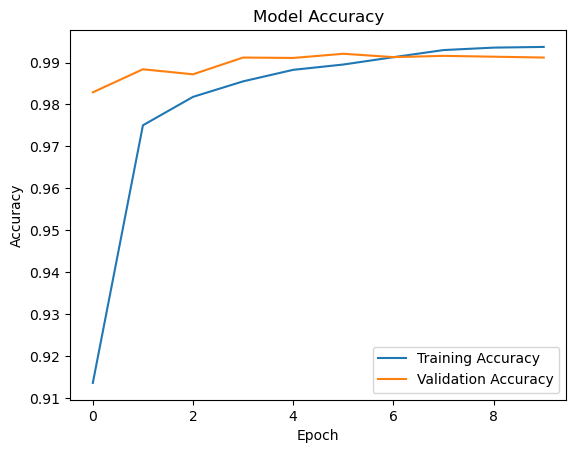

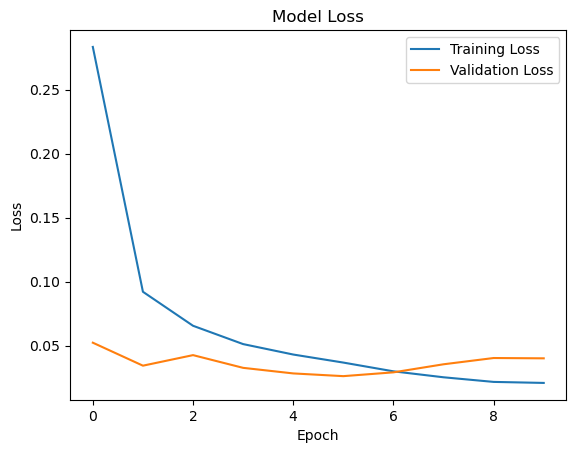

In [7]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
